In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (the file is a .txt with semicolon-separated values)
data = pd.read_csv(
    'drive/MyDrive/household_power_consumption.txt',
    sep=';',
    parse_dates={'Datetime': ['Date', 'Time']},
    infer_datetime_format=True,
    low_memory=False,
    na_values=['?']
)

<ipython-input-1-57007c57d1cf>:5: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv(
<ipython-input-1-57007c57d1cf>:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv(
<ipython-input-1-57007c57d1cf>:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv(


In [2]:
# Display initial shape and info
print("Initial number of rows:", data.shape[0])
print("Missing values per column before conversion:")
print(data.isnull().sum())

Initial number of rows: 2075259
Missing values per column before conversion:
Datetime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [3]:
# Convert all columns (except 'Datetime') to numeric
cols_to_convert = [col for col in data.columns if col != 'Datetime']
for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [4]:
# Now drop any row that has a missing value in any column
data_clean = data.dropna()
print("\nNumber of rows after dropping missing values:", data_clean.shape[0])
print("Missing values per column after dropping:")
print(data_clean.isnull().sum())


Number of rows after dropping missing values: 2049280
Missing values per column after dropping:
Datetime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [5]:
# Set the 'Datetime' column as the index for time series handling
data_clean.set_index('Datetime', inplace=True)

print('First 15 rows of the dataset:')
print(data.head(15))

First 15 rows of the dataset:
              Datetime  Global_active_power  Global_reactive_power  Voltage  \
0  2006-12-16 17:24:00                4.216                  0.418   234.84   
1  2006-12-16 17:25:00                5.360                  0.436   233.63   
2  2006-12-16 17:26:00                5.374                  0.498   233.29   
3  2006-12-16 17:27:00                5.388                  0.502   233.74   
4  2006-12-16 17:28:00                3.666                  0.528   235.68   
5  2006-12-16 17:29:00                3.520                  0.522   235.02   
6  2006-12-16 17:30:00                3.702                  0.520   235.09   
7  2006-12-16 17:31:00                3.700                  0.520   235.22   
8  2006-12-16 17:32:00                3.668                  0.510   233.99   
9  2006-12-16 17:33:00                3.662                  0.510   233.86   
10 2006-12-16 17:34:00                4.448                  0.498   232.86   
11 2006-12-16 17:35:00

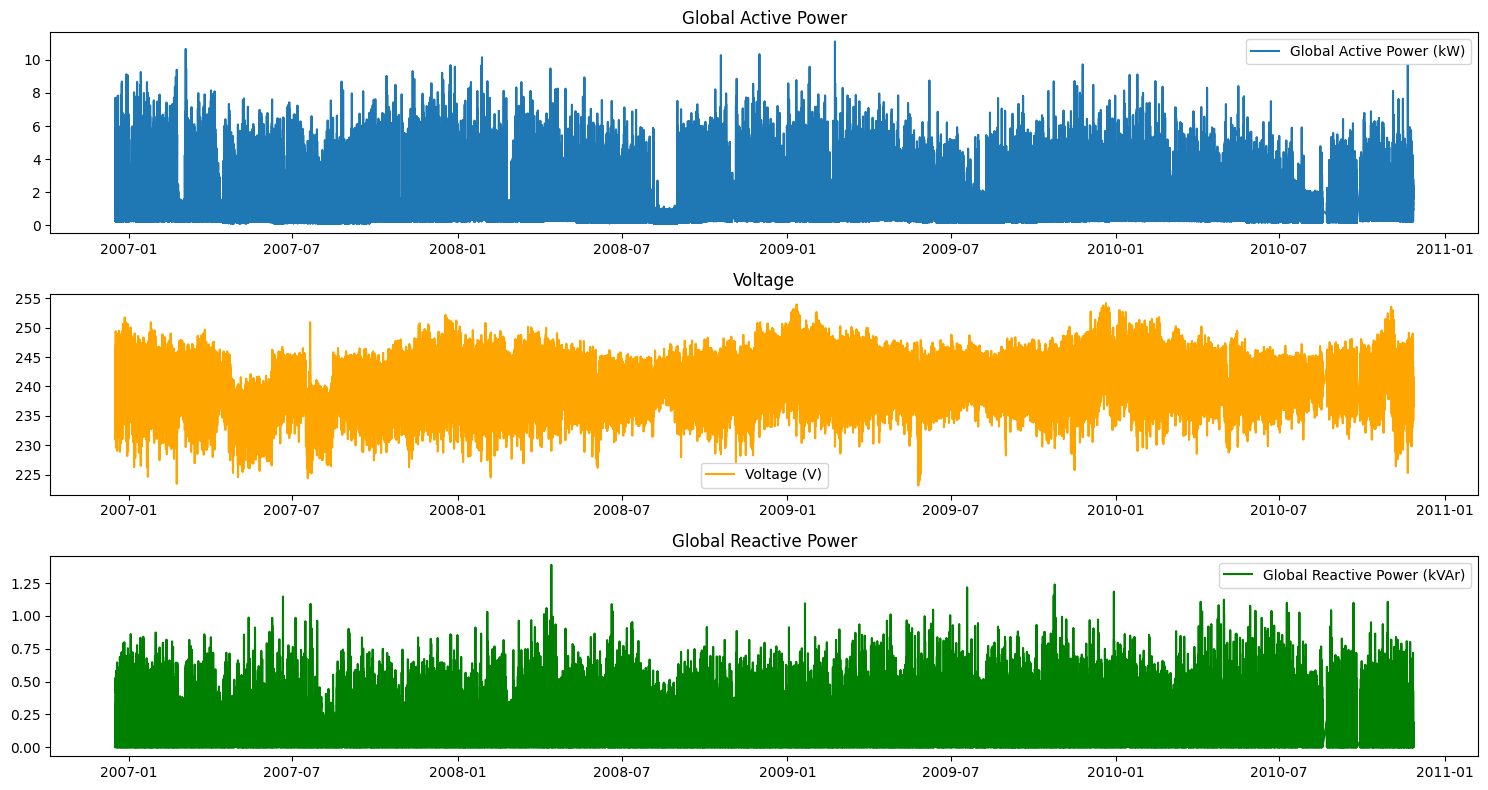

In [6]:
# Plot some key variables to see the patterns
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
plt.plot(data_clean.index, data_clean['Global_active_power'], label='Global Active Power (kW)')
plt.title('Global Active Power')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data_clean.index, data_clean['Voltage'], color='orange', label='Voltage (V)')
plt.title('Voltage')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data_clean.index, data_clean['Global_reactive_power'], color='green', label='Global Reactive Power (kVAr)')
plt.title('Global Reactive Power')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
# Resample the entire dataset to hourly frequency
hourly_data = data_clean.resample('H').mean()


<ipython-input-7-118d7f391cdf>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = data_clean.resample('H').mean()


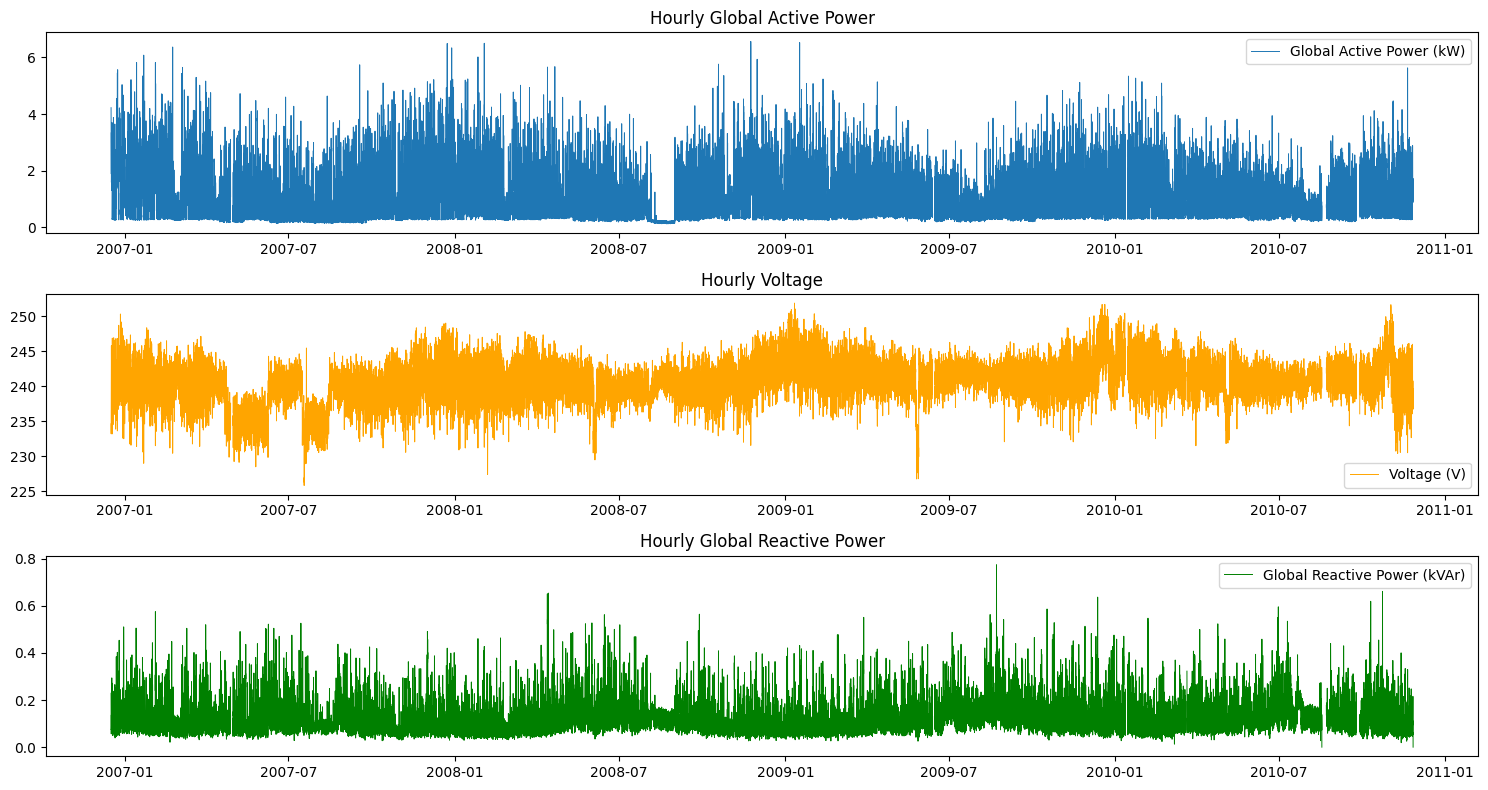

In [8]:


# Plot Global_active_power, Voltage, and Global_reactive_power (hourly)
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
plt.plot(hourly_data.index, hourly_data['Global_active_power'], label='Global Active Power (kW)', linewidth=0.7)
plt.title('Hourly Global Active Power')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(hourly_data.index, hourly_data['Voltage'], color='orange', label='Voltage (V)', linewidth=0.7)
plt.title('Hourly Voltage')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(hourly_data.index, hourly_data['Global_reactive_power'], color='green', label='Global Reactive Power (kVAr)', linewidth=0.7)
plt.title('Hourly Global Reactive Power')
plt.legend()

plt.tight_layout()
plt.show()


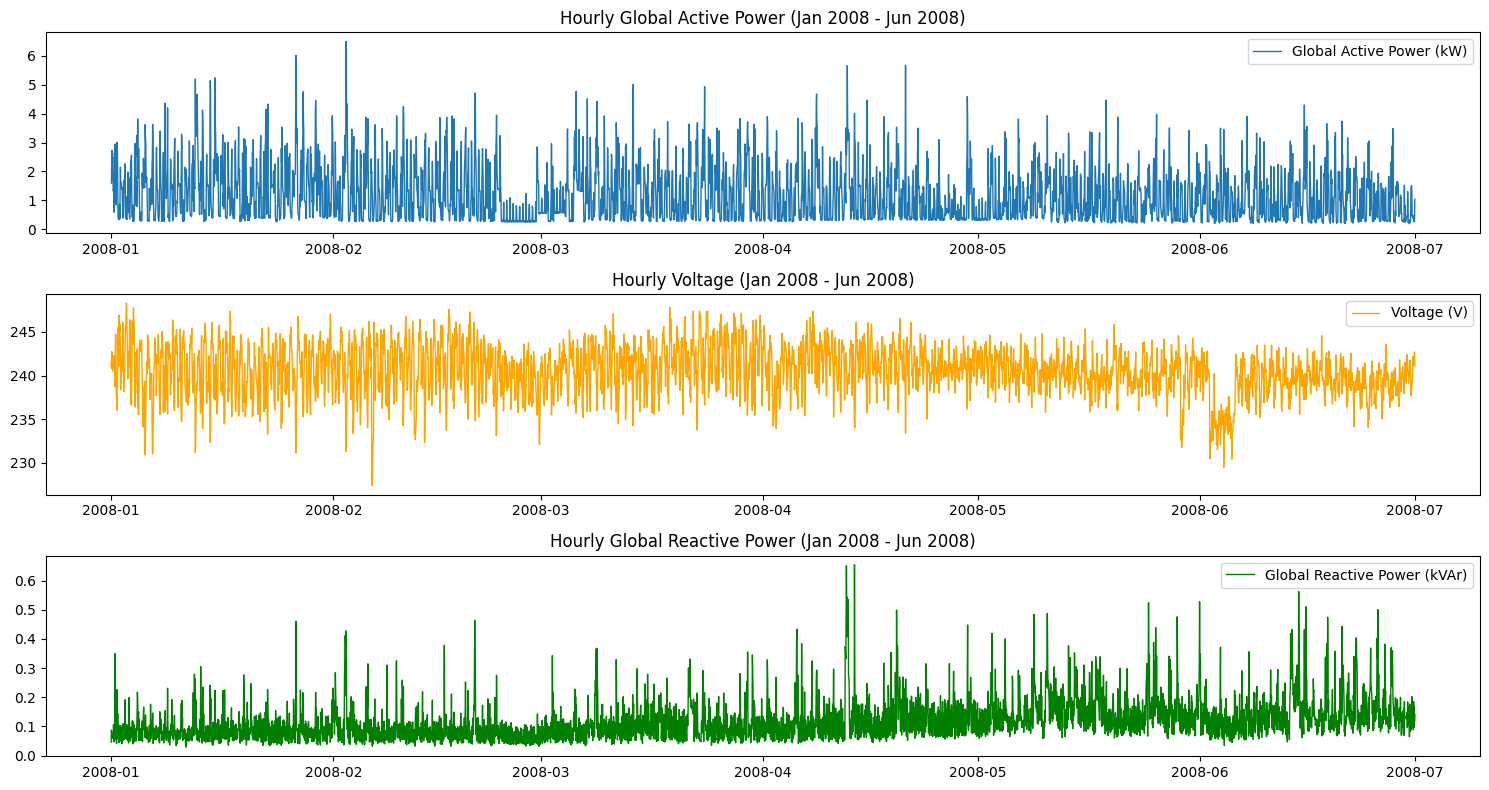

In [9]:
# Zoom in on January-June 2008
zoomed = hourly_data['2008-01-01':'2008-06-30']

plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
plt.plot(zoomed.index, zoomed['Global_active_power'], label='Global Active Power (kW)', linewidth=1)
plt.title('Hourly Global Active Power (Jan 2008 - Jun 2008)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(zoomed.index, zoomed['Voltage'], color='orange', label='Voltage (V)', linewidth=1)
plt.title('Hourly Voltage (Jan 2008 - Jun 2008)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(zoomed.index, zoomed['Global_reactive_power'], color='green', label='Global Reactive Power (kVAr)', linewidth=1)
plt.title('Hourly Global Reactive Power (Jan 2008 - Jun 2008)')
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
# If timestamp is the index, move it to a column
df = zoomed.reset_index()

# Rename the datetime column to "date" (Autoformer requires this)
df.rename(columns={df.columns[0]: 'date'}, inplace=True)

df = df[['date', 'Global_active_power', 'Global_reactive_power', 'Voltage']]



In [11]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

sequence_length = 336   # past 24 hours as input
prediction_offset = 1  # predict 1 hour ahead

# Use only the Global_active_power column
values = df['Global_active_power'].values.reshape(-1, 1)

# Scale the data to [0, 1]
scaler = MinMaxScaler()
values_scaled = scaler.fit_transform(values)

def create_sequences(data, seq_length, pred_offset):
    xs, ys = [], []
    for i in range(len(data) - seq_length - pred_offset + 1):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length + pred_offset - 1]  # target right after the window
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X, y = create_sequences(values_scaled, sequence_length, prediction_offset)
print("Input sequences shape:", X.shape)
print("Target values shape:", y.shape)


Input sequences shape: (4032, 336, 1)
Target values shape: (4032, 1)


In [12]:
import torch
import torch.nn as nn

class DecompositionLayer(nn.Module):
    """
    Decomposes a time series into its trend and seasonal components.
    """
    def __init__(self, kernel_size):
        super().__init__()
        self.kernel_size = kernel_size
        # Using 1D average pooling to compute a moving average
        self.avg = nn.AvgPool1d(kernel_size=kernel_size, stride=1, padding=0)

    def forward(self, x):
        # x shape: (Batch, Time, Features)
        # We pad both ends of the time dimension to preserve sequence length.
        num_pads = (self.kernel_size - 1) // 2
        front = x[:, :1, :].repeat(1, num_pads, 1)
        end = x[:, -1:, :].repeat(1, num_pads, 1)
        x_padded = torch.cat([front, x, end], dim=1)
        # Permute to (Batch, Features, Time) for pooling
        x_trend = self.avg(x_padded.transpose(1,2)).transpose(1,2)
        # The seasonal (or residual) component is the difference from the trend
        x_seasonal = x - x_trend
        return x_seasonal, x_trend


In [13]:
def autocorrelation(query, key):
    """
    Compute autocorrelation between query and key using FFT.

    Args:
        query: Tensor of shape (B, L, D)
        key:   Tensor of shape (B, L, D)

    Returns:
        A tensor containing the autocorrelation weights.
    """
    query_fft = torch.fft.rfft(query, dim=1)
    key_fft = torch.fft.rfft(key, dim=1)
    # Element-wise multiplication with the conjugate, then inverse FFT
    attn = torch.fft.irfft(query_fft * torch.conj(key_fft), dim=1)
    return attn


In [14]:
import math

def time_delay_aggregation(attn_weights, values, autocorrelation_factor=2):
    """
    Aggregates value states using time shifts weighted by autocorrelation.

    Args:
        attn_weights: Autocorrelation weights of shape (B, L, D)
        values:       Input values of shape (B, L, D)
        autocorrelation_factor: Hyperparameter to control the number of top delays.

    Returns:
        Aggregated output with the same shape as `values`.
    """
    B, L, D = values.shape
    # Determine the top k delays (a hyperparameter choice)
    top_k = int(autocorrelation_factor * math.log(L))
    # Compute a simple metric (mean autocorrelation across the feature dimension)
    attn_mean = attn_weights.mean(dim=-1)  # shape (B, L)

    # Get top k delays for each sample in the batch.
    topk_vals, topk_indices = torch.topk(attn_mean, top_k, dim=1)

    # Initialize aggregated output
    agg_output = torch.zeros_like(values)
    # For each top delay, shift (roll) the values and add weighted outputs.
    # (This loop is unvectorized for clarity.)
    for i in range(top_k):
        # For each batch item, roll with its own delay
        for b in range(B):
            delay = int(topk_indices[b, i].item())
            # Rolling (negative shift to align past values)
            rolled = torch.roll(values[b], shifts=-delay, dims=0)
            agg_output[b] += rolled * topk_vals[b, i]
    return agg_output


In [15]:
class AutoformerBlock(nn.Module):
    def __init__(self, d_model, kernel_size):
        super().__init__()
        self.decomp = DecompositionLayer(kernel_size)
        # A simple feed-forward mapping applied to the seasonal component
        self.linear = nn.Linear(d_model, d_model)
        self.norm = nn.LayerNorm(d_model)

    def forward(self, x):
        # x: (Batch, Time, d_model)
        # Compute autocorrelation between x and itself (using it both as query and key)
        attn_weights = autocorrelation(x, x)
        # Aggregate the values via a simple time-delay aggregation scheme
        agg_out = time_delay_aggregation(attn_weights, x)
        # Residual connection
        x = x + agg_out
        # Decompose into seasonal and trend components
        seasonal, trend = self.decomp(x)
        # Process the seasonal component and add back the trend
        seasonal_processed = self.linear(seasonal)
        out = self.norm(seasonal_processed + trend)
        return out


In [16]:
class Autoformer(nn.Module):
    def __init__(self, input_dim, d_model=64, num_layers=2, kernel_size=3):
        super().__init__()
        self.input_proj = nn.Linear(input_dim, d_model)
        # Create a stack of Autoformer blocks.
        self.blocks = nn.ModuleList([AutoformerBlock(d_model, kernel_size) for _ in range(num_layers)])
        # Final projection to output a single forecast value.
        self.output_proj = nn.Linear(d_model, 1)

    def forward(self, x):
        # x: (Batch, Time, input_dim)
        x = self.input_proj(x)
        for block in self.blocks:
            x = block(x)
        # Forecast by taking the representation at the final time step
        out = self.output_proj(x[:, -1, :])
        return out

# Instantiate the model
model = Autoformer(input_dim=1, d_model=64, num_layers=2, kernel_size=3)
print(model)


Autoformer(
  (input_proj): Linear(in_features=1, out_features=64, bias=True)
  (blocks): ModuleList(
    (0-1): 2 x AutoformerBlock(
      (decomp): DecompositionLayer(
        (avg): AvgPool1d(kernel_size=(3,), stride=(1,), padding=(0,))
      )
      (linear): Linear(in_features=64, out_features=64, bias=True)
      (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    )
  )
  (output_proj): Linear(in_features=64, out_features=1, bias=True)
)


In [17]:
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Define a custom dataset for our sliding window data.
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        # X: (num_samples, sequence_length, 1), y: (num_samples, 1)
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Split the data: here we use 80% for training # best 80
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Set device, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Early Stopping Parameters
best_val_loss = np.inf     # Tracks the best loss seen so far
patience = 5               # Number of epochs to wait for improvement before stopping
epochs_without_improve = 0

num_epochs = 20
for epoch in range(num_epochs):
    # Training Phase
    model.train()
    train_losses = []
    for batch_x, batch_y in train_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        optimizer.zero_grad()
        output = model(batch_x)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    avg_train_loss = np.mean(train_losses)

    # Evaluation Phase on Test (Validation) Set
    model.eval()
    test_losses = []
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            output = model(batch_x)
            loss = criterion(output, batch_y)
            test_losses.append(loss.item())

    avg_test_loss = np.mean(test_losses)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

    # Early Stopping Check: If loss improves, reset counter and save best model
    if avg_test_loss < best_val_loss:
        best_val_loss = avg_test_loss
        epochs_without_improve = 0
        # Optionally, save the best model checkpoint:
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        epochs_without_improve += 1

    # If no improvement for 'patience' consecutive epochs, stop training
    if epochs_without_improve >= patience:
        print("Early stopping triggered.")
        break


Epoch [1/20] - Train Loss: 0.0243, Test Loss: 0.0103
Epoch [2/20] - Train Loss: 0.0146, Test Loss: 0.0102
Epoch [3/20] - Train Loss: 0.0147, Test Loss: 0.0101
Epoch [4/20] - Train Loss: 0.0143, Test Loss: 0.0103
Epoch [5/20] - Train Loss: 0.0147, Test Loss: 0.0100
Epoch [6/20] - Train Loss: 0.0143, Test Loss: 0.0103
Epoch [7/20] - Train Loss: 0.0145, Test Loss: 0.0101


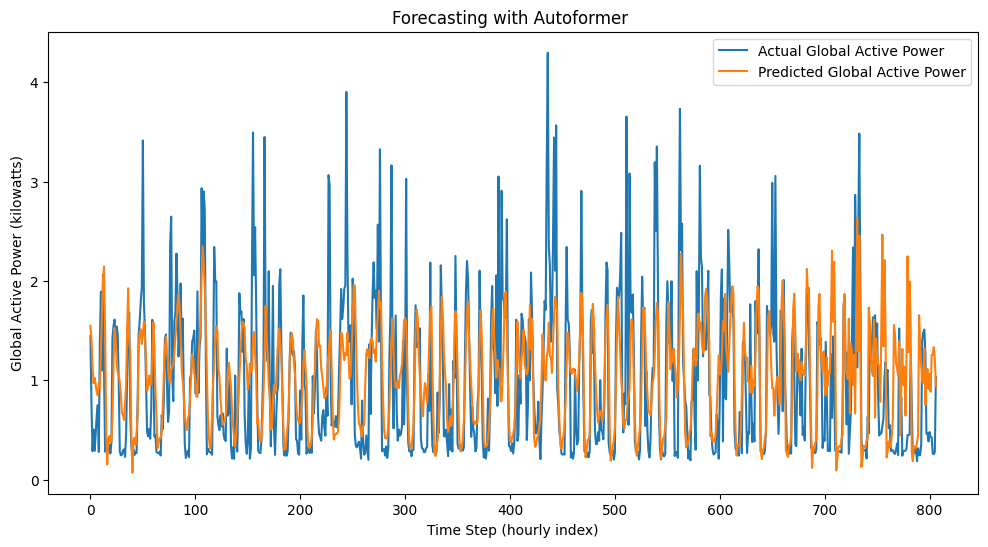

In [18]:
model.eval()
predictions = []
ground_truths = []
with torch.no_grad():
    for batch_x, batch_y in test_loader:
        batch_x = batch_x.to(device)
        output = model(batch_x)
        predictions.append(output.cpu().numpy())
        ground_truths.append(batch_y.numpy())

predictions = np.concatenate(predictions).reshape(-1, 1)
ground_truths = np.concatenate(ground_truths).reshape(-1, 1)

# Inverse-transform to recover original scale
preds_inv = scaler.inverse_transform(predictions)
actuals_inv = scaler.inverse_transform(ground_truths)

plt.figure(figsize=(12,6))
plt.plot(actuals_inv, label="Actual Global Active Power")
plt.plot(preds_inv, label="Predicted Global Active Power")
plt.xlabel("Time Step (hourly index)")
plt.ylabel("Global Active Power (kilowatts)")
plt.title("Forecasting with Autoformer ")
plt.legend()
plt.show()


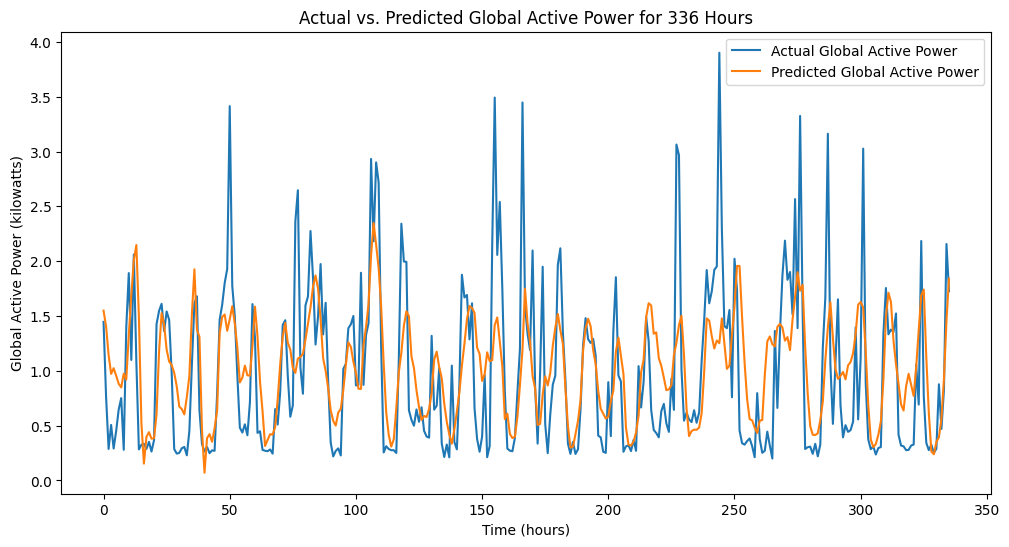

In [20]:


# Assuming actuals_inv and preds_inv are NumPy arrays of shape (num_samples, 1)
# and that each sample corresponds to one hour.
# Here we select the first 48 hours for a zoomed-in view.

plt.figure(figsize=(12, 6))
plt.plot(actuals_inv[:336], label="Actual Global Active Power")
plt.plot(preds_inv[:336], label="Predicted Global Active Power")
plt.xlabel("Time (hours)")
plt.ylabel("Global Active Power (kilowatts)")
plt.title("Actual vs. Predicted Global Active Power for 336 Hours")
plt.legend()
plt.show()
